# Hotel Booking Demand EDA

In this Exploratory data analysis, I would like to explore the hotel booking demand dataset that contains booking information for a city hotel and a resort hotel, including the booking time, length of stay, bumber of adults/children, and other relevant features. In the given analysis I aim to answer the following questions: 

1. What is the most popular month for bookings at the city hotel and the resort hotel?
2. How do cancellation rates differ between the city hotel and the resort hotel, and what factors contribute to cancellations?
3. How do booking patterns differ between customers from different countries or regions?
4. Are there any correlations between the price of a room and other features, such as room type, booking channel, or lead time?
5. What are the most common customer types (e.g. business travelers, leisure travelers, couples) at the city hotel and the resort hotel, and how do their booking patterns differ?

The EDA includes following steps:
1. Library Loading and File Importing
2. Basic Data Exploration
3. Data Cleaning
4. Data Visualization
5. Statistical analyses
6. Summary

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('hotel_bookings.csv')

## Basic Data Exploration

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [49]:
df.shape

(119390, 32)

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [22]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Missing Values in Children (float), country (object), agent (float) and company (float)

In [35]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [52]:
df[df['agent'].isnull()]
df[df['company'].isnull()]

# These columns has mostly 'Other' as value, and it's not very informative so better drop them.
df = df.drop(['agent', 'company'], axis = 1)

In [54]:
#as there are only 4 cells with missing children data let's replace it by 0; and country column by "Other"
df ["children"]= df["children"].fillna(0)
df["country"]= df["country"].fillna("Other")

In [55]:
# making new column for total stays 
df["total_stays"] = df["stays_in_week_nights"]+ df["stays_in_weekend_nights"]

In [56]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Data Visualization


### What is most popular month for bookings at resort- and city hotel?

In [57]:
df_city_hotel = df.loc[(df['hotel'] == "City Hotel")]
df_resort_hotel = df.loc[(df['hotel'] == "Resort Hotel")]

In [58]:
df_city_hotel = df_city_hotel.groupby('arrival_date_month', as_index=False)['total_stays'].sum()\
                             .sort_values(by="total_stays", ascending = False)

<Axes: xlabel='arrival_date_month', ylabel='total_stays'>

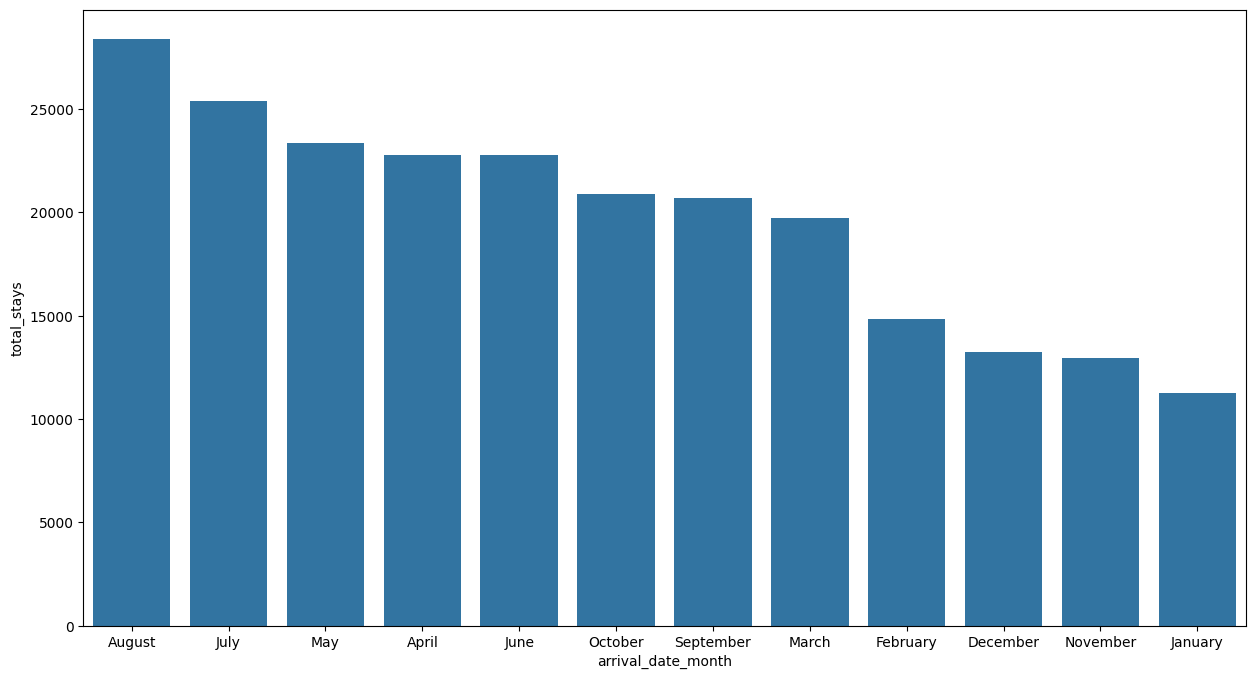

In [61]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_city_hotel, x='arrival_date_month', y='total_stays')

In [62]:
df_resort_hotel = df_resort_hotel.groupby('arrival_date_month', as_index = False)['total_stays'].sum()\
                  .sort_values(by = "total_stays", ascending = False)

<Axes: xlabel='arrival_date_month', ylabel='total_stays'>

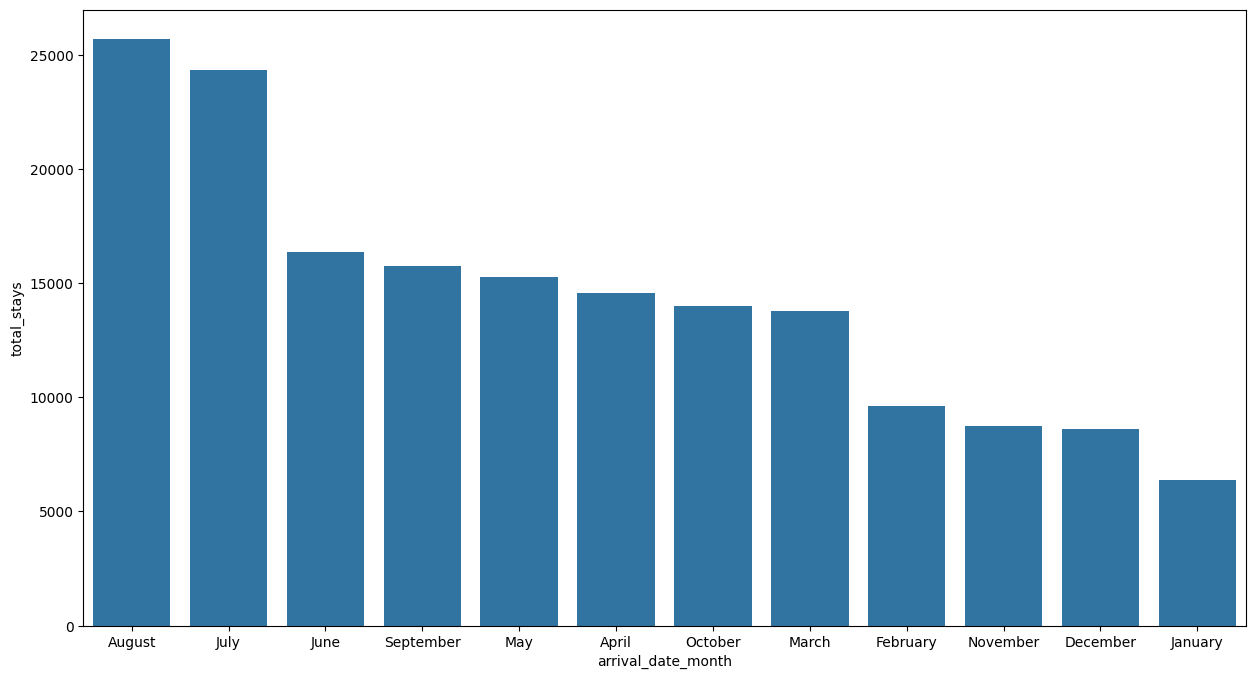

In [63]:
plt.figure(figsize = (15,8))
sns.barplot(data = df_resort_hotel, x = 'arrival_date_month', y = 'total_stays')

**Summary**: Peak occupancy for both hotels occurs in July-August, with City Hotel seeing high demand in May and Resort Hotel in June. This aligns with city breaks during spring holidays versus summer vacation preferences for resort stays.

#### How do cancellation rates differ between the city hotel and the resort hotel, and what factors contribute to cancellations?

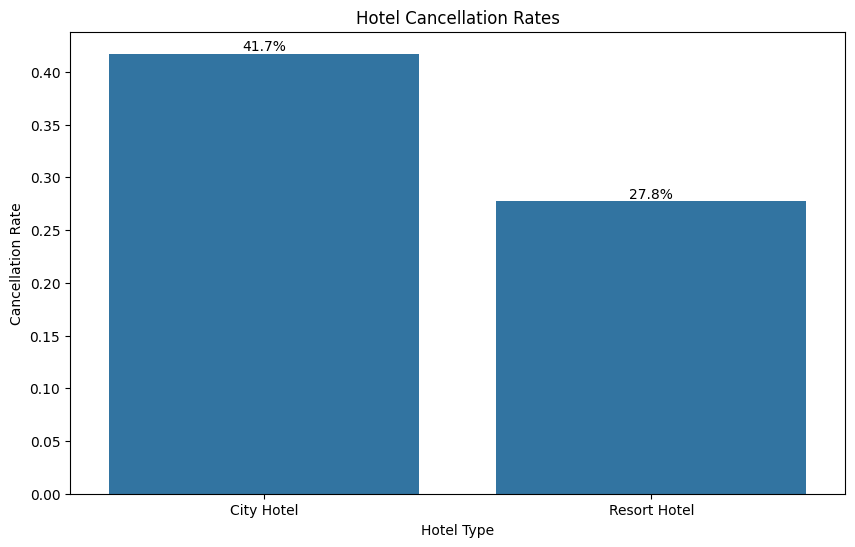

In [ ]:
# cancellation rates
cancel_rates = df.groupby(['hotel', 'is_canceled']).size().unstack()
cancel_rates['Total'] = cancel_rates.sum(axis=1)
cancel_rates['Cancellation_Rate'] = cancel_rates[1] / cancel_rates['Total']

# Plot cancellation rates
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='Cancellation_Rate', data=cancel_rates.reset_index())
plt.title('Hotel Cancellation Rates')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')

# Add percentage labels on bars
for i, v in enumerate(cancel_rates['Cancellation_Rate']):
   plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

plt.show()

In [69]:
corr_matrix=df._get_numeric_data().corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658,0.017779
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712,0.157167
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531,0.031438
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149,0.018719
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062,-0.027408
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671,0.762790
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192,0.941005
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884,0.105249
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736,0.050865
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889,0.022283


<Axes: >

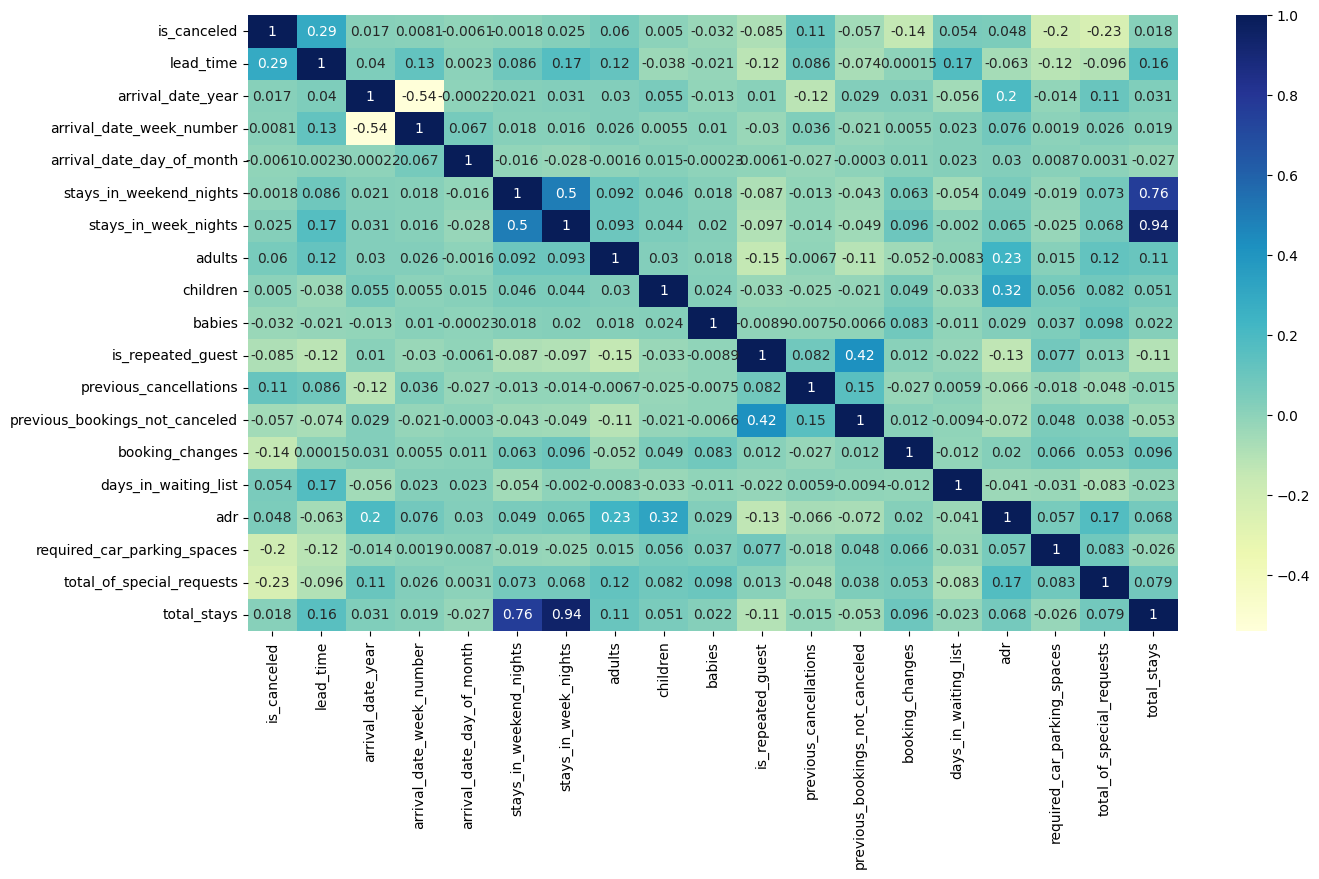

In [84]:
# Select only highly correlated features
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

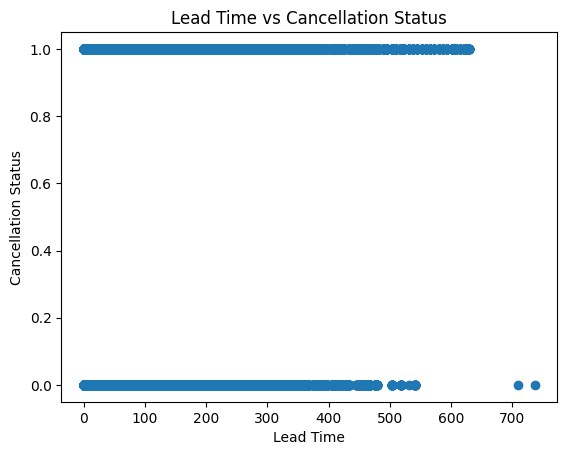

In [85]:
plt.figure()
plt.scatter(df['lead_time'], df['is_canceled'])
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Status')
plt.title('Lead Time vs Cancellation Status')
plt.show()

**Summary** City Hotel has significantly higher cancellation rates (40%+) compared to Resort Hotel (28%). This difference likely stems from Resort Hotel bookings being tied to planned summer vacations, while City Hotel bookings are more spontaneous and flexible. The data shows longer lead times (booking-to-arrival periods) correlate with higher cancellation rates, suggesting that earlier bookings face more uncertainty and potential changes in plans.